In [67]:
# non parametric minimal probability experiment

from matplotlib import colors, cm
import matplotlib.pyplot as plt


import numpy as np
import math
import time
import utpy.utils
import utpy.vis
import flatpy

In [68]:
#sample histogram with two bins
def sampleHistogram(a1,b1,c1,numSamples,threshold):

    # True computation using plain Monte Carlo    
    sampleHistogram = np.zeros((1,numSamples))        
    for k in range(numSamples):
        s = np.random.uniform(0,1,1)
        if (s < threshold):
            sampleHistogram[0,k] = np.random.uniform(a1,b1,1)
        else:
            sampleHistogram[0,k] = np.random.uniform(b1,c1,1)
        
    return sampleHistogram

In [69]:
# MC sampling
# make sure a<b for each interval below

#X1 (one bin with width w=2)
a1 = 3
b1 = 5

#X2 (two bins each with width k=1)
a2 = 2
b2 = 3
c2 = 4

#X3
a3 = 4
b3 = 5
c3 = 6

#X4 
a4 = 4
b4 = 5

#X5
a5 = 4
b5 = 5

threshold = 0.4

# histogram representation
numBins1 = 1
numBins2 = 2
numBins3 = 2
numBins4 = 1
numBins5 = 1

hist1 = np.zeros((numBins1,))
bins1 = np.zeros((numBins1+1,))
hist1[0] = 1
bins1[0] = a1
bins1[1] = b1
print(hist1)
print(bins1)


hist2 = np.zeros((numBins2,))
bins2 = np.zeros((numBins2+1,))
hist2[0] = threshold
hist2[1] = 1-threshold
bins2[0] = a2
bins2[1] = b2
bins2[2] = c2

hist3 = np.zeros((numBins3,))
bins3 = np.zeros((numBins3+1,))
hist3[0] = threshold
hist3[1] = 1-threshold
bins3[0] = a3
bins3[1] = b3
bins3[2] = c3

hist4 = np.zeros((numBins4,))
bins4 = np.zeros((numBins4+1,))
hist4[0] = 1
bins4[0] = a4
bins4[1] = b4

hist5 = np.zeros((numBins5,))
bins5 = np.zeros((numBins5+1,))
hist5[0] = 1
bins5[0] = a5
bins5[1] = b5

numSamples = 800000
numMinima = 0

subpart1 = 0
subpart2 = 0

x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = sampleHistogram(a2,b2,c2,numSamples,threshold)
x3Samples = sampleHistogram(a3,b3,c3,numSamples,threshold)
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))
    
for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        numMinima = numMinima + 1
        
print('x1 minimum probability (truth)', numMinima/numSamples)  


[1.]
[3. 5.]
x1 minimum probability (truth) 0.15008375


In [70]:
# Computation in parts (Monte Carlo)

subpart1=0
subpart2=0
subpart3=0
subpart4=0

# Part 1
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart1 = subpart1 + 1
subpart1Prob = subpart1/numSamples      
factor1= threshold*threshold

# Part 2
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=b2, high=c2, size=(1,numSamples))
x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart2 = subpart2 + 1
subpart2Prob = subpart2/numSamples
factor2= (1-threshold)*threshold

# Part 3
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
x3Samples = np.random.uniform(low=b3, high=c3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart3 = subpart3 + 1
subpart3Prob = subpart3/numSamples      
factor3= threshold*(1-threshold)

# Part 4
x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
x2Samples = np.random.uniform(low=b2, high=c2, size=(1,numSamples))
x3Samples = np.random.uniform(low=b3, high=c3, size=(1,numSamples))
x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

for k in range(numSamples):
    if (x1Samples[0,k] < x2Samples[0,k]) and (x1Samples[0,k] < x3Samples[0,k]) and (x1Samples[0,k] < x4Samples[0,k]) and (x1Samples[0,k] < x5Samples[0,k]):
        subpart4 = subpart4 + 1
subpart4Prob = subpart4/numSamples
factor4= (1-threshold)*(1-threshold)


print("probability using parts", factor1*subpart1Prob + factor2*subpart2Prob + factor3*subpart3Prob + factor4*subpart4Prob)


probability using parts 0.15002400000000002


In [71]:
def computeIntegral(l=None, h=None, h2=None, h3=None, h4=None, h5=None, n1=1, n2=1, n3=1, n4=1, n5=1):
    
    intUp = 0
    intDown = 0
    
    normalizingFactor = 1/(n1*n2*n3*n4*n5)
    
    
    if (l is not None) and (h is not None) and  (h2 is None) and (h3 is None) and (h4 is None) and (h5 is None):
    
        intUp = normalizingFactor*h
        intDown = normalizingFactor*l
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is None) and (h4 is None) and (h5 is None):
        
        # Double check this
        intUp = normalizingFactor* (h2*h - h*h/2)
        intDown = normalizingFactor* (h2*l - l*l/2)
     
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is None) and (h5 is None):
    
        intUp = normalizingFactor * (h3*h2*h - (h3+h2)*h*h/2 + h*h*h/3)
        intDown = normalizingFactor * (h3*h2*l - (h3+h2)*l*l/2 + l*l*l/3)
    
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is None):
    
        intUp = normalizingFactor * (h4*h3*h2*h - (h2*h3+h2*h4+h3*h4)*(h**2/2) + (h2+h3+h4)*(h**3/3) - h**4/4)
        intDown = normalizingFactor * (h4*h3*h2*l - (h2*h3+h2*h4+h3*h4)*(l**2/2) + (h2+h3+h4)*(l**3/3) - l**4/4)
        
    if (l is not None) and (h is not None) and (h2 is not None) and (h3 is not None) and (h4 is not None) and (h5 is not None):
        
        intUp = normalizingFactor * (h5*h4*h3*h2*h - (h2*h3*h4+h2*h3*h5+h2*h4*h5+h3*h4*h5)*(h**2/2) + (h2*h3+h2*h4+h2*h5+h3*h4+h3*h5+h4*h5)*(h**3/3) - (h2+h3+h4+h5)*(h**4/4) + h**5/5)
        intDown = normalizingFactor * (h5*h4*h3*h2*l - (h2*h3*h4+h2*h3*h5+h2*h4*h5+h3*h4*h5)*(l**2/2) + (h2*h3+h2*h4+h2*h5+h3*h4+h3*h5+h4*h5)*(l**3/3) - (h2+h3+h4+h5)*(l**4/4) + l**5/5)
        
    return (intUp-intDown)

def superOptimizedCase(indexOfa1,x1Limits, sortedI, w1):
    
    minimaProb = 0
    
    highLimits = []
    intervalWidths = []
    
    # The first 0,None are dummy for ease of indexing in next for loop
    upLimits = [0,None,None,None,None,None]
    normalizerWidths = [0, w1, 1,1,1,1]
    
    # Depending on how many intervals started before a1, it will properly set upper integral limits and normalizers
    # for the starting integral
    for k in range(indexOfa1):
        interval = sortedI[k]
        upLimits[k+2] = interval[1]
        normalizerWidths[k+2] = interval[1]-interval[0]
        
    minimaProb = minimaProb + computeIntegral(l=x1Limits[indexOfa1],h=x1Limits[indexOfa1+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerWidths[1],n2=normalizerWidths[2],n3=normalizerWidths[3],n4=normalizerWidths[4],n5=normalizerWidths[5])
        
    # Start piecewise integration where limits of each piece for X1 random variable are in xLimits array
    # Note that limits always are at start points of intervals fortunately, except the last one which is minimum
    # among all b's
    for j in range(indexOfa1+1,len(x1Limits)-1):
        
        interval = sortedI[j]
        upLimits[j+1] = interval[1]
        normalizerWidths[j+1] = interval[1]-interval[0]
        
        minimaProb = minimaProb + computeIntegral(l=x1Limits[j],h=x1Limits[j+1],h2=upLimits[2],h3=upLimits[3],h4=upLimits[4],h5=upLimits[5],n1=normalizerWidths[1],n2=normalizerWidths[2],n3=normalizerWidths[3],n4=normalizerWidths[4],n5=normalizerWidths[5])
        
    return minimaProb

# Compute analytical local minimum probability
def superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5):
    
    # Go through list of intervals sorted by their starting points, and find interval from end of sorted list which 
    # contains bMin
    I1 = [a1,b1]
    I2 = [a2,b2]
    I3 = [a3,b3]
    I4 = [a4,b4]
    I5 = [a5,b5]

    w1 = b1-a1
    w2 = b2-a2
    w3 = b3-a3
    w4 = b4-a4
    w5 = b5-a5

    bMin = min([b1,b2,b3,b4,b5])
    #print('bMin:',bMin)

    # if bMin is smaller than a1, then return minima probability to be 0

    if (bMin <= a1):
        minimaProb = 0

    else:
        
        I = [I1,I2,I3,I4,I5]
        #print(I)
    
        # get interval order based on starting points
        startPointList = [a1, a2, a3, a4, a5]
        #print(startPointList)
        order = np.argsort(startPointList)
        #print(order)    

        sortedI = [I[order[0]],I[order[1]], I[order[2]], I[order[3]], I[order[4]]]
        #print('sortedI',sortedI)

        numIntervals = 4

        # Find the interval from end in a list sorted by starting points which contains bMin
        for i in reversed(range(numIntervals+1)):
            intervalFromEnd = sortedI[i]
            if (bMin >= intervalFromEnd[0]) and (bMin <= intervalFromEnd[1]):
                break;

        endInterval = i
        #print('endInterval', endInterval)

        # Sorted starts appended by bMin
        x1Limits = []

        for i in range(endInterval+1):
            interval = sortedI[i]    
            x1Limits.append(interval[0])
    
        x1Limits.append(bMin)
        #print(x1Limits)

        # Identify where start of interval of interest lies in x1Limits array. We start integrating from that point onward
        for i in range(len(x1Limits)):
    
            if x1Limits[i] == a1:  
                break
        
        indexOfa1 = i
        #print('indexOfa1',indexOfa1)

        minimaProb = superOptimizedCase(indexOfa1,x1Limits, sortedI, w1)
    
    #print('Minima probability', minimaProb)
    return minimaProb  
# Computation in parts (Closed form)

subpart1=0
subpart2=0
subpart3=0
subpart4=0

# Part 1
subpart1Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5)
factor1= threshold*threshold

# Part 2
subpart2Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,b2,c2,a3,b3,a4,b4,a5,b5)
factor2= (1-threshold)*threshold

# Part 3
subpart3Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,b3,c3,a4,b4,a5,b5)
factor3= threshold*(1-threshold)

# Part 4
subpart4Prob = superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,b2,c2,b3,c3,a4,b4,a5,b5)
factor4= (1-threshold)*(1-threshold)


print("probability using parts", factor1*subpart1Prob + factor2*subpart2Prob + factor3*subpart3Prob + factor4*subpart4Prob)


probability using parts 0.15


In [72]:
# Minmum Probability computation for a single pixel using histogram approach (Monte Carlo)
# If there are n bins each at point of interest and 4 local neighbors, computational time complexity
# is  n^5*(numberofMonteCarlo samples)

# Pass histogram and bin_edges information computed using numpy histogram at the point of interest and each of local neighbors
def histogramMonteCarlo(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5, numSamples):

    minimumProb = 0
    numBins1 = len(hist1)
    numBins2 = len(hist2)
    numBins3 = len(hist3)
    numBins4 = len(hist4)
    numBins5 = len(hist5)
    
    # Make sure sum of hist is 1
    hist1 = hist1/np.sum(hist1)
    hist2 = hist2/np.sum(hist2)
    hist3 = hist3/np.sum(hist3)
    hist4 = hist4/np.sum(hist4)
    hist5 = hist5/np.sum(hist5)
    
    for i in range(numBins1):
        for j in range (numBins2):
            for k in range (numBins3):
                for l in range(numBins4):
                    for m in range(numBins5):
                    
                        # end points of bins
                        a1 = bins1[i]
                        b1 = bins1[i+1]
                        a2 = bins2[j]
                        b2 = bins2[j+1]
                        a3 = bins3[k]
                        b3 = bins3[k+1]
                        a4 = bins4[l]
                        b4 = bins4[l+1]
                        a5 = bins5[m]
                        b5 = bins5[m+1]
                    
                        # Probabilitis of bins
                        p1 = hist1[i]
                        p2 = hist2[j]
                        p3 = hist3[k]
                        p4 = hist4[l]
                        p5 = hist5[m]
                    
                        # Probability of the bin configuration
                        p = p1*p2*p3*p4*p5
                    
                        x1Samples = np.random.uniform(low=a1, high=b1, size=(1,numSamples))
                        x2Samples = np.random.uniform(low=a2, high=b2, size=(1,numSamples))
                        x3Samples = np.random.uniform(low=a3, high=b3, size=(1,numSamples))
                        x4Samples = np.random.uniform(low=a4, high=b4, size=(1,numSamples))
                        x5Samples = np.random.uniform(low=a5, high=b5, size=(1,numSamples))

                        subpart = 0
                    
                        for n in range(numSamples):
                            if (x1Samples[0,n] < x2Samples[0,n]) and (x1Samples[0,n] < x3Samples[0,n]) and (x1Samples[0,n] < x4Samples[0,n]) and (x1Samples[0,n] < x5Samples[0,n]):
                                subpart = subpart + 1
                    
                        subpartProb = subpart/numSamples 
                    
                        minimumProb = minimumProb + p*subpartProb
                    
    return minimumProb
    print("probability using parts (Monte Carlo)", minimumProb) 

In [73]:
# Minmum Probability computation for a single pixel using histogram approach (Closed form)
# If there are n bins each at point of interest and 4 local neighbors, computational time complexity
# is  n^5

def histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5):

    minimumProb = 0
    numBins1 = len(hist1)
    numBins2 = len(hist2)
    numBins3 = len(hist3)
    numBins4 = len(hist4)
    numBins5 = len(hist5)
    
    # Make sure sum of hist is 1
    hist1 = hist1/np.sum(hist1)
    hist2 = hist2/np.sum(hist2)
    hist3 = hist3/np.sum(hist3)
    hist4 = hist4/np.sum(hist4)
    hist5 = hist5/np.sum(hist5)
    
    for i in range(numBins1):
        for j in range (numBins2):
            for k in range (numBins3):
                for l in range(numBins4):
                    for m in range(numBins5):
                    
                        # end points of bins
                        a1 = bins1[i]
                        b1 = bins1[i+1]
                        a2 = bins2[j]
                        b2 = bins2[j+1]
                        a3 = bins3[k]
                        b3 = bins3[k+1]
                        a4 = bins4[l]
                        b4 = bins4[l+1]
                        a5 = bins5[m]
                        b5 = bins5[m+1]
                    
                        # Probabilitis of bins
                        p1 = hist1[i]
                        p2 = hist2[j]
                        p3 = hist3[k]
                        p4 = hist4[l]
                        p5 = hist5[m]
                    
                        # Probability of the bin configuration
                        p = p1*p2*p3*p4*p5
                    
                        minimumProb = minimumProb + p*superOptimizedAnlyticalLocalMinimumProbabilityComputation(a1,b1,a2,b2,a3,b3,a4,b4,a5,b5)
                    
    return minimumProb
    print("probability using parts (closed form)", minimumProb)      
                    

In [74]:
minProbMC = histogramMonteCarlo(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5, numSamples)
minProbClosed = histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bins1, bins2, bins3, bins4, bins5)
print(minProbMC)
print(minProbClosed)

0.15001994999999999
0.15


In [75]:
# define normalized 2D gaussian
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

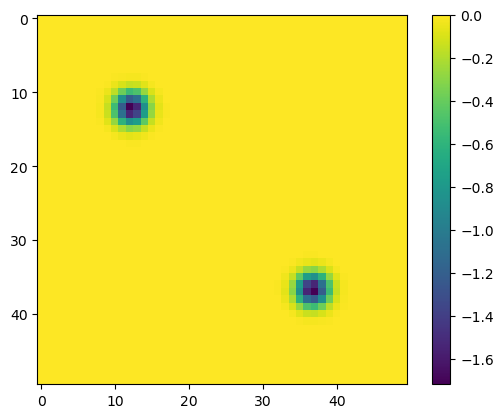

In [76]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
z1 = gaus2d(x, y, 2.5, 2.5, 0.3,0.3)
z2 = gaus2d(x, y, -2.5, -2.5, 0.3,0.3)
truthDataset = -(z1+z2)
img = plt.imshow(truthDataset)
plt.colorbar(img)

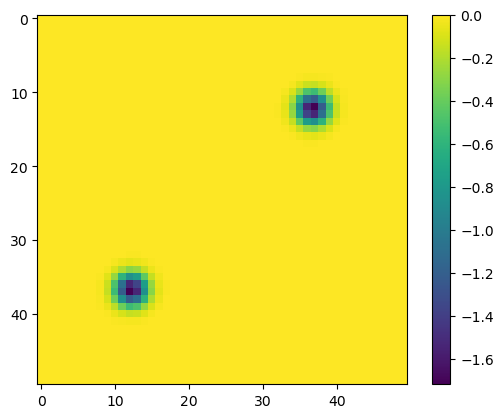

In [77]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
z1 = gaus2d(x, y, -2.5, 2.5, 0.3, 0.3)
z2 = gaus2d(x, y, 2.5, -2.5, 0.3, 0.3)
rotatedOutlierDataset = -(z1+z2)
img = plt.imshow(rotatedOutlierDataset)
plt.colorbar(img)

In [78]:
def add_Gaussian_noise(field, noise_level, numMembers):
    h,w = field.shape
    ensemble = np.zeros((h,w,numMembers))
    
    for i in range(numMembers):
        epsilon = np.random.normal(0,noise_level,[h,w])
        ensemble[:,:,i] = field + epsilon
        
    return ensemble

(50, 50, 40)
(50, 50, 50)


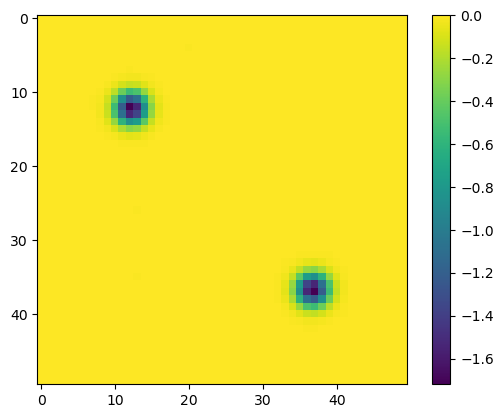

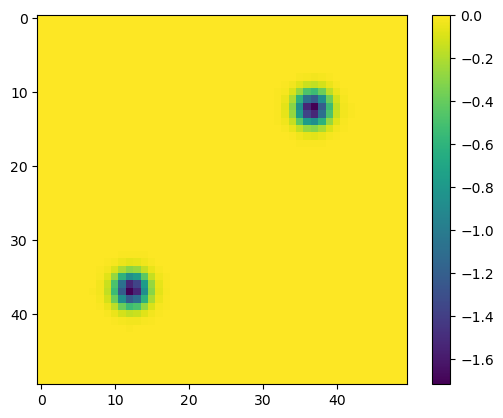

In [79]:
noise_level = 0.001

truthEnsembleDataset = add_Gaussian_noise(truthDataset,noise_level,40)
plt.figure()
img = plt.imshow(truthEnsembleDataset[:,:,0])
plt.colorbar(img)
print(truthEnsembleDataset.shape)

rotatedOutlierEnsembleDataset = add_Gaussian_noise(rotatedOutlierDataset,noise_level,10)
plt.figure()
img = plt.imshow(rotatedOutlierEnsembleDataset[:,:,0])
plt.colorbar(img)

ensemble = np.concatenate((truthEnsembleDataset, rotatedOutlierEnsembleDataset), axis=2)


print(ensemble.shape)

xv yv 5 5
2.1404075273138443
(5, 5, 10)
[[3.63836933 4.71616361 3.50751039 3.49211426 4.63861542]
 [4.69773108 4.51797571 3.75487979 3.77400247 4.50357296]
 [3.55777419 3.65835422 2.15850738 2.25361623 3.53656376]
 [3.37035172 3.52304627 2.22888441 2.21439722 3.7490914 ]
 [4.78623572 4.61415369 3.64042168 3.72528893 4.43303851]]
[[3.66260393 4.56405522 3.59845726 3.48598698 4.63622332]
 [4.59629503 4.60752368 3.63900416 3.6688716  4.4065756 ]
 [3.51146637 3.68048564 2.17151197 2.25844452 3.69903237]
 [3.44280443 3.63391867 2.19297743 2.0234275  3.69502812]
 [4.70431292 4.45753928 3.55196257 3.60157211 4.49832458]]
[[3.64405728 4.64259124 3.61008277 3.37431925 4.58148446]
 [4.56883157 4.57530433 3.58504374 3.64170684 4.46659472]
 [3.38946124 3.54702796 2.1819912  2.04416419 3.56995908]
 [3.44525622 3.73605237 2.03323647 2.23030087 3.54323035]
 [4.78566146 4.52623873 3.77748662 3.67855708 4.59822163]]


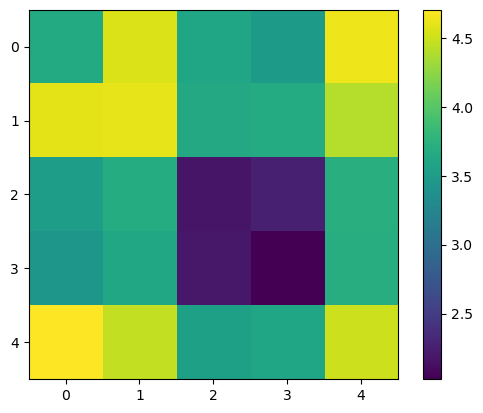

In [80]:
# use previous ens data
foo = flatpy.nD.available_functions["ackley"]
fractional_noise_level=20
persistence = 0.665
n_clusters = 9
count = 10
noise_level = 0.01*persistence*fractional_noise_level
noise_model = "uniform"
ground_truth, ensemble = utpy.utils.generate_ensemble(foo, noise_level, count, noise_model)
ensemble = ensemble
ground_truth = ground_truth
print(np.min(ground_truth))
print(ensemble.shape)
print(ensemble[:,:,0])
print(ensemble[:,:,1])
print(ensemble[:,:,2])
img = plt.imshow(ensemble[:,:,1])

plt.colorbar(img)

In [81]:
# Analytically compute local minima probabilities for ensembles using histograms
# TODO: Handle voxel probabilities on domain boundaries
def analyticalLocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numBinsPerHistogram):
    
    h, w, d = ensemble.shape
            
    minimumGrid = np.amin(ensemble, axis=2)
    maximumGrid = np.amax(ensemble, axis=2)    
        
    # perform sampling
    #numSamples = 10000
    minimaProbabilities = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):    
               
            # Compute empirically how frequently point is local maximum
            numTimesLocalMinimum = 0 
            localManimumProb = 0
            # print out first 3 ensemble for testing
            print(i,j,ensemble[i,j,0:2])    
            if i >=1 and i<=h-2 and j >=1 and j<=w-2 : 
                
                #Derive histogram for each vertex
                numBins = numBinsPerHistogram
                hist1, bin_edges1 = np.histogram(ensemble[i,j,:], bins=numBins)
                hist2, bin_edges2 = np.histogram(ensemble[i+1,j,:], bins=numBins)
                hist3, bin_edges3 = np.histogram(ensemble[i-1,j,:], bins=numBins)
                hist4, bin_edges4 = np.histogram(ensemble[i,j+1,:], bins=numBins)
                hist5, bin_edges5 = np.histogram(ensemble[i,j-1,:], bins=numBins)
                
                if i == 2 and j <=3:
                    print("debug hist i j",i,j)
                    print("debug ens:", ensemble[i,j,:])
                    print("hist1:",hist1,"normalized hist1", hist1/np.sum(hist1))
                    print("bin_edges1:",bin_edges1)
                #print("bin_edges1:", bin_edges1)
                
                localMinimumProb = histogramClosedForm(hist1, hist2, hist3, hist4, hist5, bin_edges1, bin_edges2, bin_edges3, bin_edges4, bin_edges5)
                minimaProbabilities[i,j] = localMinimumProb 

                
    return minimaProbabilities

0 0 [3.63836933 3.66260393]
0 1 [4.71616361 4.56405522]
0 2 [3.50751039 3.59845726]
0 3 [3.49211426 3.48598698]
0 4 [4.63861542 4.63622332]
1 0 [4.69773108 4.59629503]
1 1 [4.51797571 4.60752368]
1 2 [3.75487979 3.63900416]
1 3 [3.77400247 3.6688716 ]
1 4 [4.50357296 4.4065756 ]
2 0 [3.55777419 3.51146637]
2 1 [3.65835422 3.68048564]
debug hist i j 2 1
debug ens: [3.65835422 3.68048564 3.54702796 3.65685216 3.74281288 3.67043869
 3.63831053 3.6601465  3.57536277 3.61719739]
hist1: [2 1 4 2 1] normalized hist1 [0.2 0.1 0.4 0.2 0.1]
bin_edges1: [3.54702796 3.58618494 3.62534193 3.66449891 3.7036559  3.74281288]
2 2 [2.15850738 2.17151197]
debug hist i j 2 2
debug ens: [2.15850738 2.17151197 2.1819912  2.0323957  2.19346901 2.18115895
 2.19947432 2.16432358 2.18378633 2.13071859]
hist1: [1 0 1 2 6] normalized hist1 [0.1 0.  0.1 0.2 0.6]
bin_edges1: [2.0323957  2.06581143 2.09922715 2.13264287 2.16605859 2.19947432]
2 3 [2.25361623 2.25844452]
debug hist i j 2 3
debug ens: [2.25361623 2.25

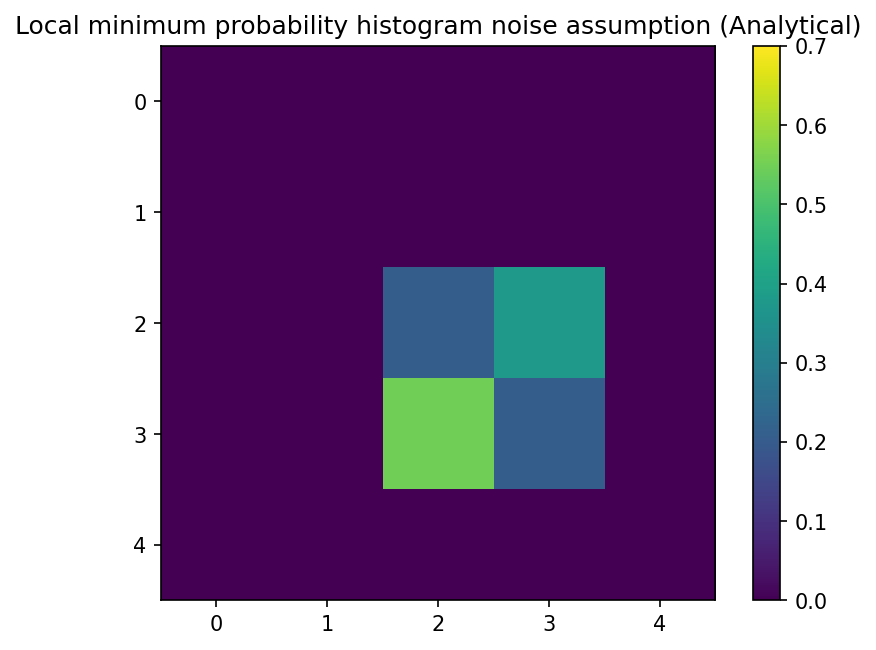

In [82]:
#Visualize local minima probabilities :  Closed form
# TODO, there is gaussian noise in the original data set, use the input data set that is fixed
start = time.time()
numBinsPerHistogram = 5
histogramLocalMinimumProbabilitiesAnalytical = analyticalLocalMinimaProbabilityIndependentHistogramWithBoundaryNotHandled(ensemble, numBinsPerHistogram)
end = time.time()
print('Time:',end - start)
#localMaximumProbabilitiesMonteCarlo = localMaximaProbabilityMultivariateGaussian(ensemble)
plt.figure()
plt.title('Local minimum probability histogram noise assumption (Analytical)')
print("check histogramLocalMinimumProbabilitiesAnalytical results")
print(histogramLocalMinimumProbabilitiesAnalytical)
img2 = plt.imshow(histogramLocalMinimumProbabilitiesAnalytical, vmin=0, vmax=0.7)
#plt.gca().invert_yaxis()
plt.colorbar(img2)
#plt.contour(localMinimumProbabilitiesMonteCarlo, levels=[0.2], colors='#FFFFFF')
plt.gcf().set_dpi(150)
